<a href="https://colab.research.google.com/github/juhaina1997/credit_score_classification/blob/main/Juhaina_Luminar_mlproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CREDIT SCORE CLASSIFICATION***
Banks and credit card companies calculate your credit score to determine your creditworthiness. It helps banks and credit card companies immediately to issue loans to customers with good creditworthiness. Today banks and credit card companies use Machine Learning algorithms to classify all the customers in their database based on their credit history.

There are three credit scores that banks and credit card companies use to label their customers:

Good

Standard

Poor

A person with a good credit score will get loans from any bank and financial institution. For the task of Credit Score Classification, we need a labelled dataset with credit scores.

In [ ]:
#start the task of credit score classification by importing the necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# **Data Understanding (EDA) and Data Selection**

Exploratory Data Analysis, or EDA, is an important step in any Data Analysis or Data Science project. EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.

EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better. In this article, we will understand EDA with the help of an example dataset. We will use Python language (Pandas library) for this purpose.

In [ ]:
# read the dataset using pandas
df = pd.read_csv('/content/train.csv')
df

<ipython-input-2-80c836b7a06c>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/train.csv')


ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

In [ ]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [ ]:
df.shape

(100000, 28)

In [ ]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

array([[<Axes: title={'center': 'Monthly_Inhand_Salary'}>,
        <Axes: title={'center': 'Num_Bank_Accounts'}>,
        <Axes: title={'center': 'Num_Credit_Card'}>],
       [<Axes: title={'center': 'Interest_Rate'}>,
        <Axes: title={'center': 'Delay_from_due_date'}>,
        <Axes: title={'center': 'Num_Credit_Inquiries'}>],
       [<Axes: title={'center': 'Credit_Utilization_Ratio'}>,
        <Axes: title={'center': 'Total_EMI_per_month'}>, <Axes: >]],
      dtype=object)

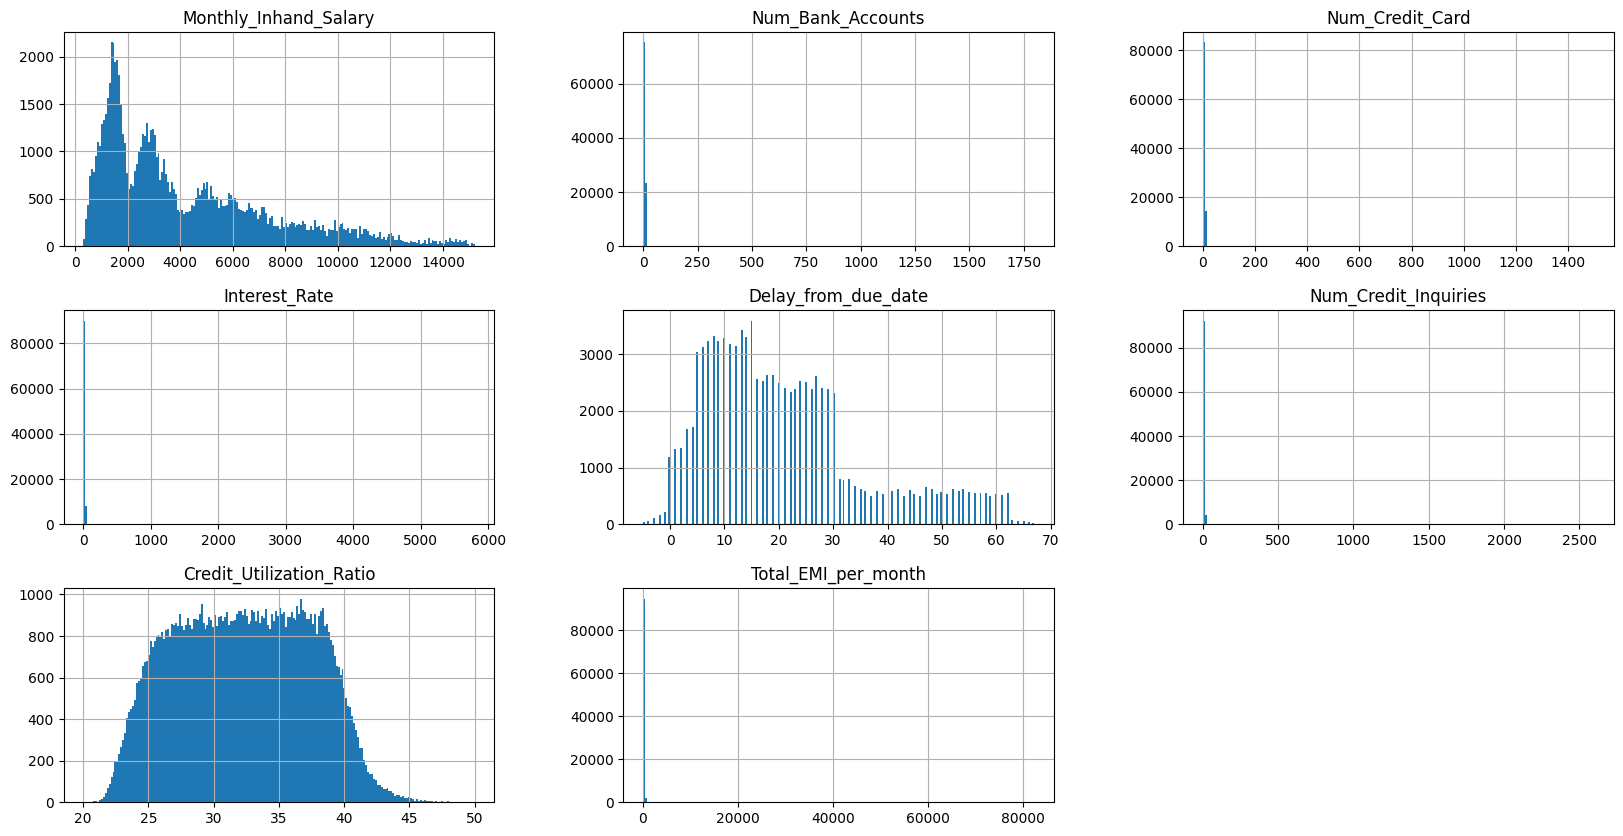

In [ ]:
df.hist(bins=200,figsize=[20,10])

In [ ]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(15, 15), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

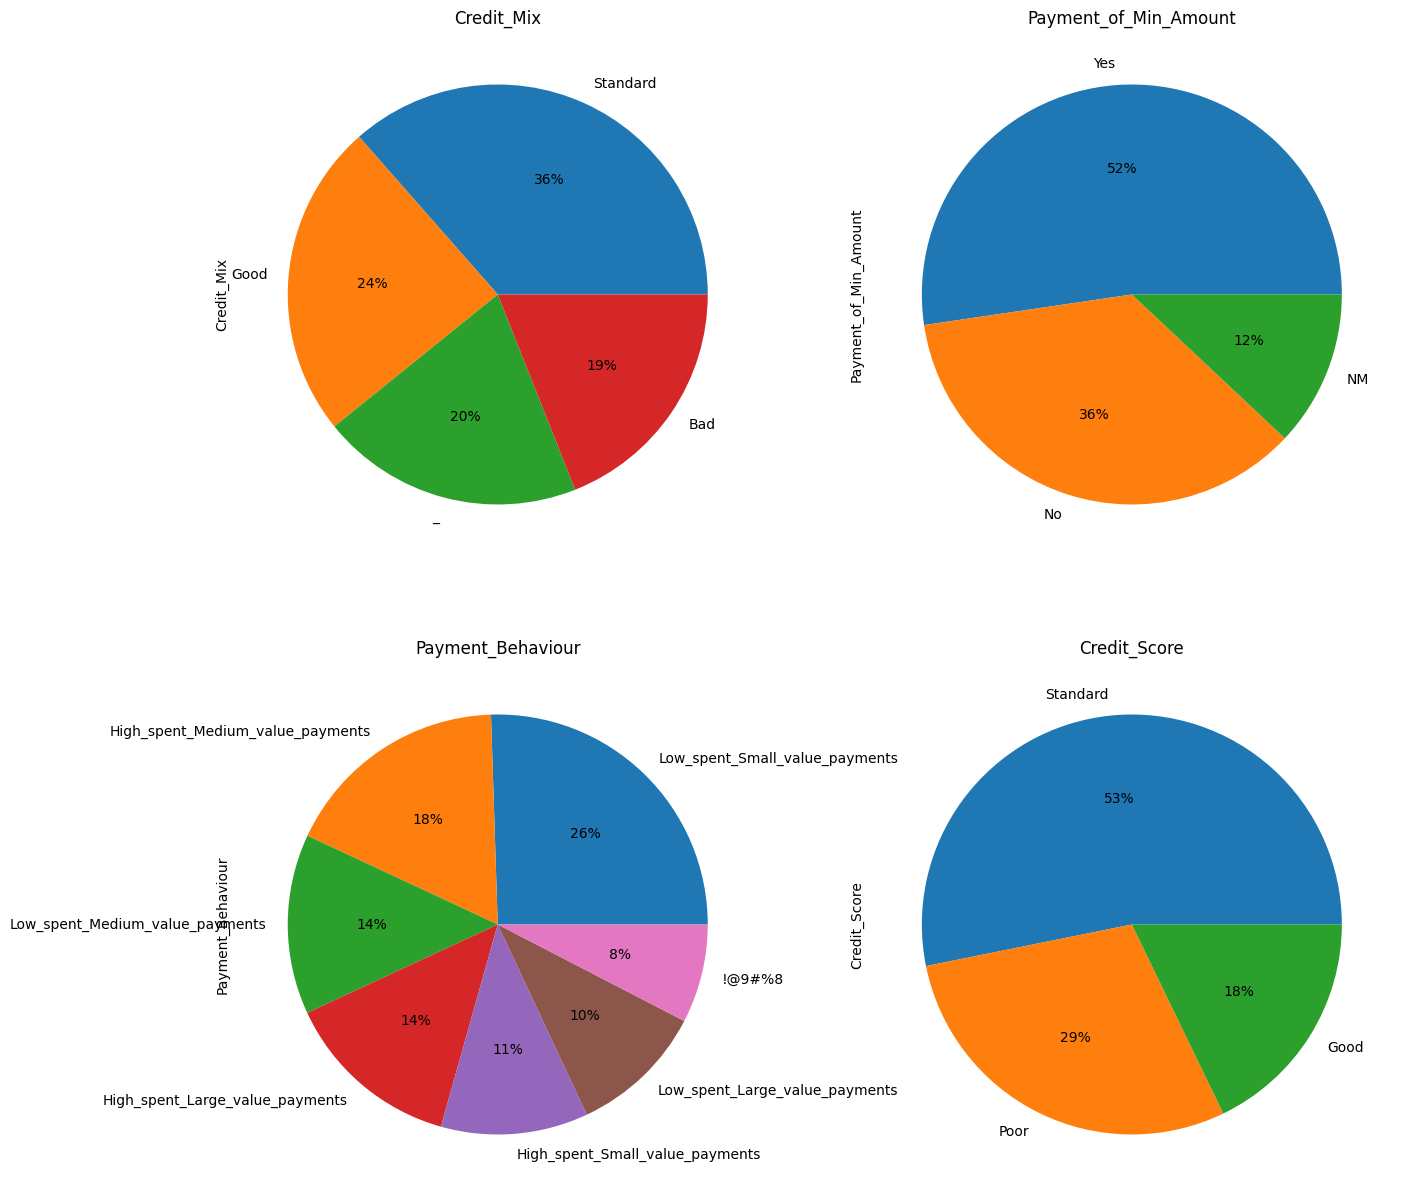

In [ ]:
pie_plot(df, ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score'], 2,2)

<Axes: xlabel='Occupation', ylabel='count'>

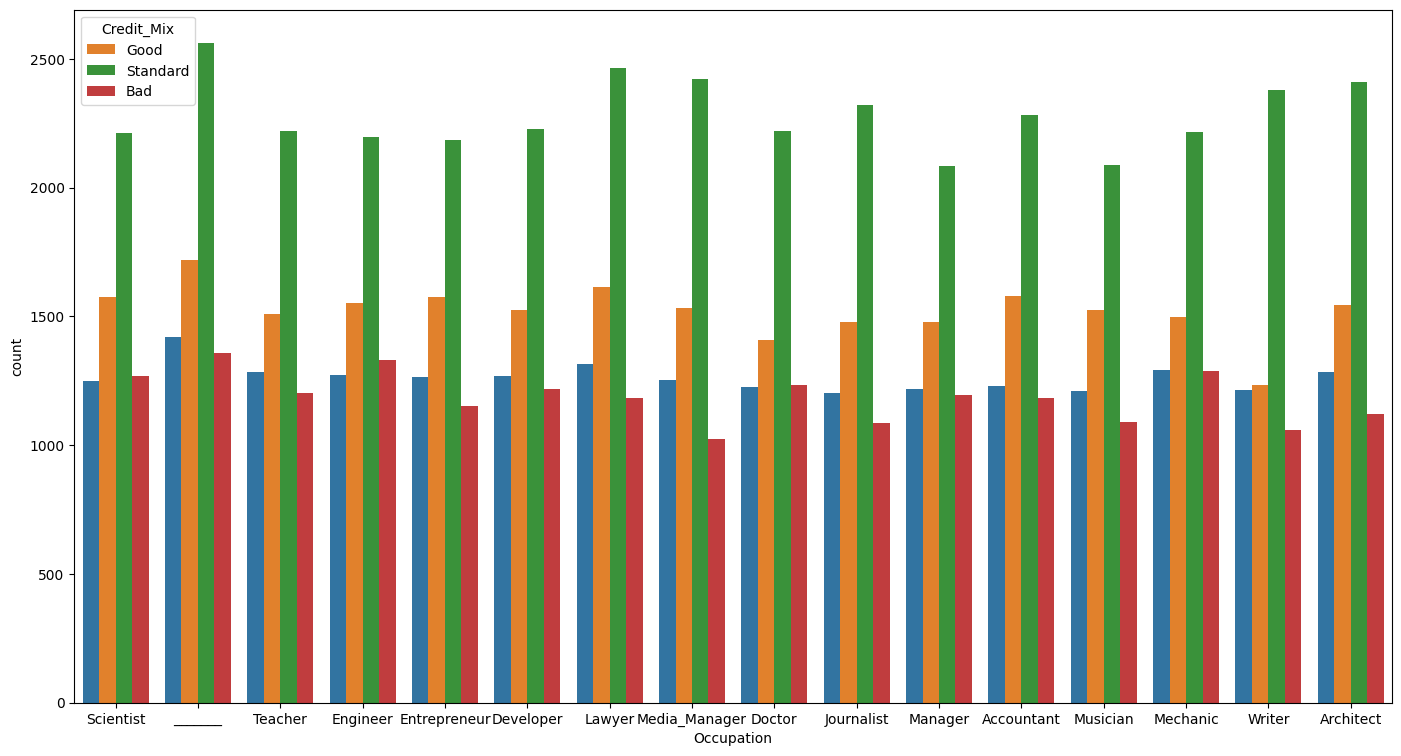

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Mix")

<Axes: xlabel='Occupation', ylabel='count'>

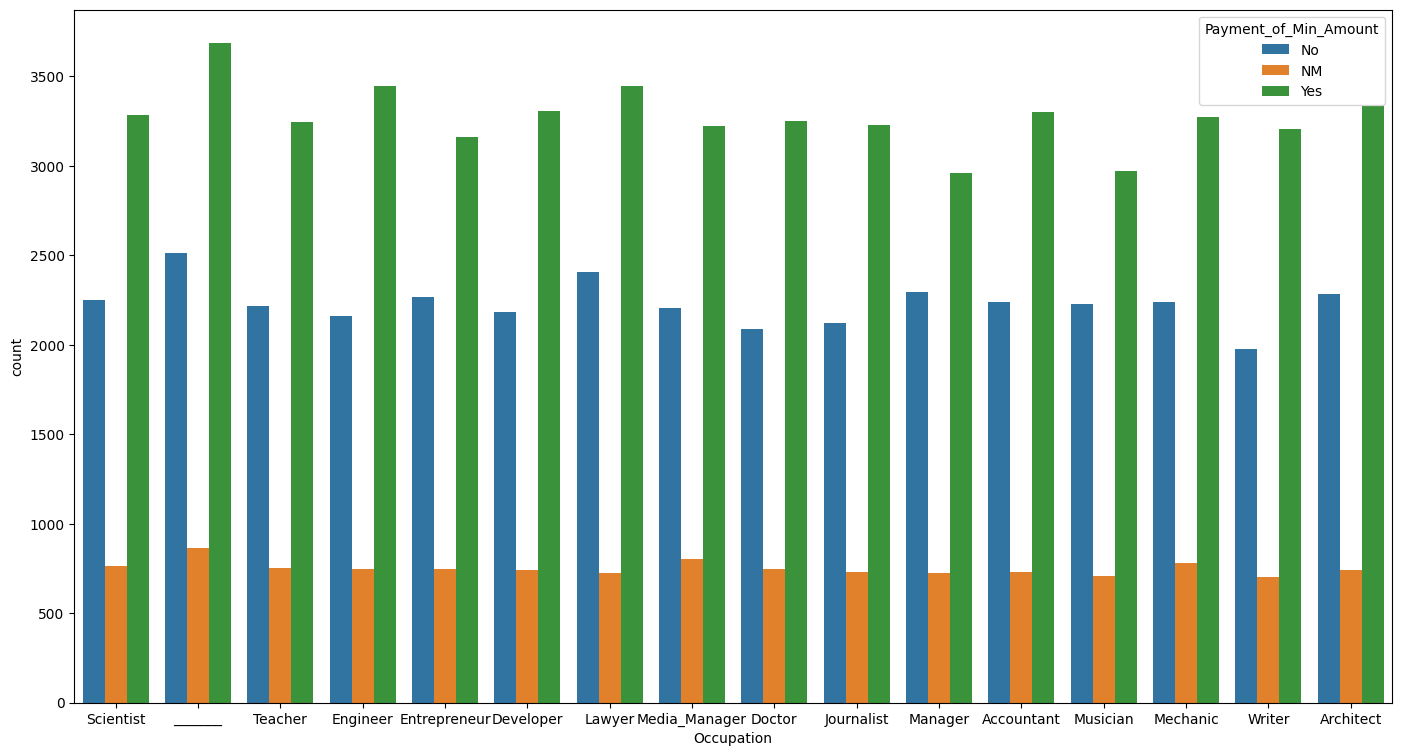

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_of_Min_Amount")

<Axes: xlabel='Occupation', ylabel='count'>

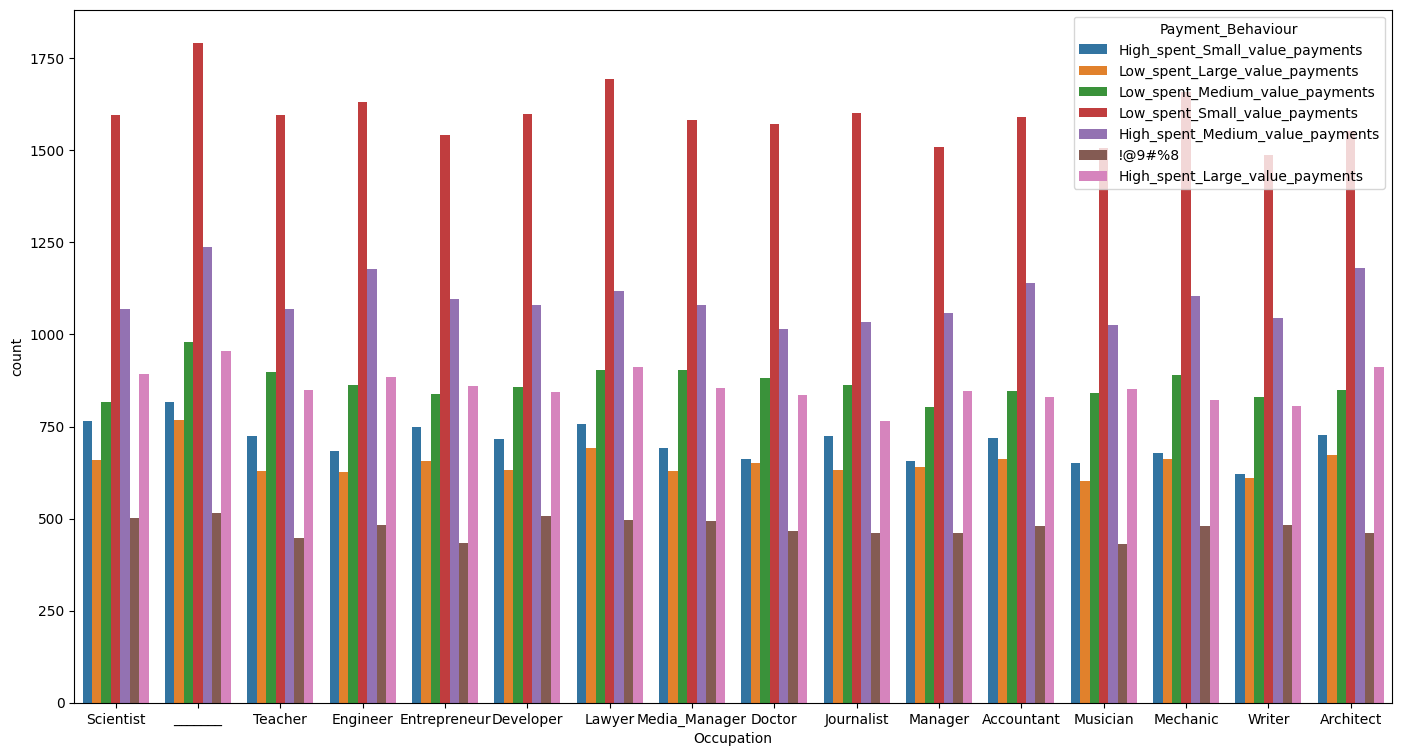

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Payment_Behaviour")

<Axes: xlabel='Occupation', ylabel='count'>

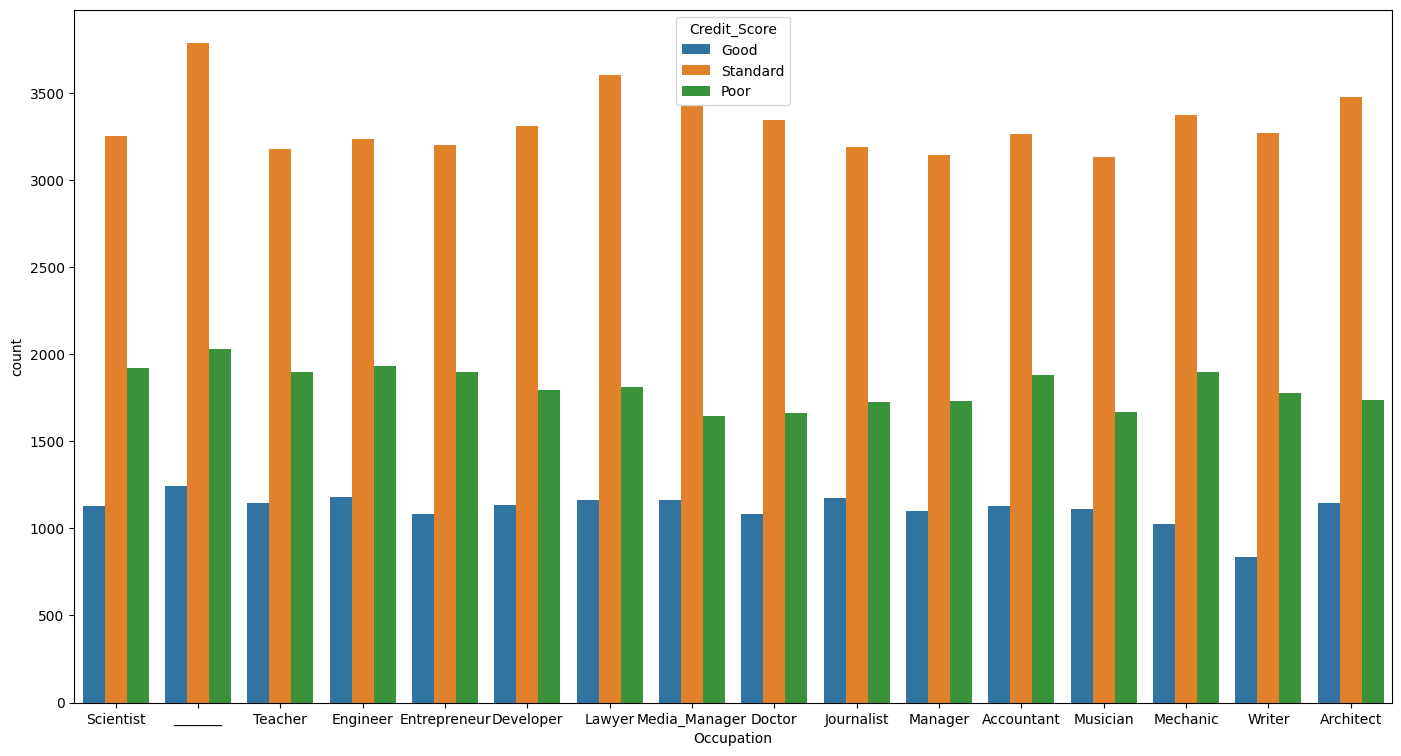

In [ ]:
fig = plt.figure(figsize= (17,9))
sns.countplot(data=df,x="Occupation",hue="Credit_Score")

In [ ]:

#exploring the occupation feature to know if the occupation of the person affects credit scores:
import plotly.express as px
fig = px.box(df,
             x="Occupation",
             color="Credit_Score",
             title="Credit Scores Based on Occupation",
             color_discrete_map={'Poor':'red',
                                 'Standard':'yellow',
                                 'Good':'green'})
fig.show()

In [ ]:
#explore whether the Annual Income of the person impacts your credit scores or not:
fig = px.box(df,
             x="Credit_Score",
             y="Annual_Income",
             color="Credit_Score",
             title="Credit Scores Based on Annual Income",
             color_discrete_map={'Poor':'red',
                                 'Standard':'yellow',
                                 'Good':'green'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [ ]:
#Drop the column which is out of model scope
drop_df=df.drop(['ID' ,'Customer_ID' ,'Month' ,'Name', 'Type_of_Loan', 'Credit_History_Age', 'SSN'], axis=1).copy()
drop_df

Age Occupation Annual_Income  Monthly_Inhand_Salary  \
0        23  Scientist      19114.12            1824.843333   
1        23  Scientist      19114.12                    NaN   
2      -500  Scientist      19114.12                    NaN   
3        23  Scientist      19114.12                    NaN   
4        23  Scientist      19114.12            1824.843333   
...     ...        ...           ...                    ...   
99995    25   Mechanic      39628.99            3359.415833   
99996    25   Mechanic      39628.99            3359.415833   
99997    25   Mechanic      39628.99            3359.415833   
99998    25   Mechanic      39628.99            3359.415833   
99999    25   Mechanic     39628.99_            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                      3                4              3           4   
1                      3                4              3           4   
2                      3                4              3           4   
3                      3                4              3           4   
4                      3                4              3           4   
...                  ...              ...            ...         ...   
99995                  4                6              7           2   
99996                  4                6              7           2   
99997                  4                6           5729           2   
99998                  4                6              7           2   
99999                  4                6              7           2   

       Delay_from_due_date Num_of_Delayed_Payment  ... Num_Credit_Inquiries  \
0                        3                      7  ...                  4.0   
1                       -1                    NaN  ...                  4.0   
2                        3                      7  ...                  4.0   
3                        5                      4  ...                  4.0   
4                        6                    NaN  ...                  4.0   
...                    ...                    ...  ...                  ...   
99995                   23                      7  ...                  3.0   
99996                   18                      7  ...                  3.0   
99997                   27                      6  ...                  3.0   
99998                   20                    NaN  ...                  3.0   
99999                   18                      6  ...                  3.0   

       Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0               _           809.98                26.822620   
1            Good           809.98                31.944960   
2            Good           809.98                28.609352   
3            Good           809.98                31.377862   
4            Good           809.98                24.797347   
...           ...              ...                      ...   
99995           _           502.38                34.663572   
99996           _           502.38                40.565631   
99997        Good           502.38                41.255522   
99998        Good           502.38                33.638208   
99999        Good           502.38                34.192463   

       Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                         No           49.574949        80.41529543900253   
1                         No           49.574949       118.28022162236736   
2                         No           49.574949          81.699521264648   
3                         No           49.574949        199.4580743910713   
4                         No           49.574949       41.420153086217326   
...                      ...                 ...                      ...   
99995                     No           35.104023        60.97133255718485   
99996                     No           35.104023        54.18595

# ***Replace Invalid Values to NULL***

In [ ]:
#Explore the NAN value in the dataset
drop_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
# #Drop it
# drop_na = drop_df.dropna().copy()
drop_df.duplicated().sum()

0

In [ ]:
size_before_cleaning = drop_df.shape
drop_df =drop_df[drop_df.isnull().sum(axis=1) < 3]
print("{} Records dropped".format(size_before_cleaning[0] - drop_df.shape[0]))

101 Records dropped


In [ ]:
def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

In [ ]:
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif '_' in str(value):
        return str(value).replace("_", "")
    elif str(value) == '_':
        return str(value)
    else:
        return str(value)

In [ ]:
def Amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)

# ***Transforming***

In [ ]:
drop_df ["Amount_invested_monthly"]=drop_df ["Amount_invested_monthly"].apply(Amount_invested_monthly)
drop_df ["Amount_invested_monthly"]=drop_df ["Amount_invested_monthly"].astype("float")

<ipython-input-22-3e7f77415be1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-3e7f77415be1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drop_df["Changed_Credit_Limit"]=drop_df["Changed_Credit_Limit"].apply(lambda x:x.split("-")[-1])
drop_df.drop(drop_df[drop_df["Changed_Credit_Limit"]=="_"].index,inplace=True)
drop_df["Changed_Credit_Limit"]=drop_df["Changed_Credit_Limit"].astype("float")

<ipython-input-23-20989e00dfca>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-20989e00dfca>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-20989e00dfca>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drop_df.drop(drop_df[drop_df["Monthly_Balance"]=='__-333333333333333333333333333__'].index,inplace=True)
for i in ['Age', 'Annual_Income', 'Num_of_Loan', 'Outstanding_Debt', 'Monthly_Balance']:
    drop_df[i] = drop_df[i].apply(filter_general)
    drop_df[i] = drop_df[i].astype(np.float64)
    print(i + " Successfully Cleaned")

<ipython-input-24-6857def93c33>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-6857def93c33>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-24-6857def93c33>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Age Successfully Cleaned
Annual_Income Successfully Cleaned
Num_of_Loan Successfully Cleaned
Outstanding_Debt Successfully Cleaned
Monthly_Balance Successfully Cleaned


In [ ]:
drop_df['Num_of_Delayed_Payment'] = drop_df['Num_of_Delayed_Payment'].apply(filter_delayed_payments)
drop_df['Num_of_Delayed_Payment'] = drop_df['Num_of_Delayed_Payment'].astype(np.float64)

<ipython-input-25-f4d7b9f02ee9>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-f4d7b9f02ee9>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drop_df['Occupation'] = drop_df['Occupation'].replace('_______', np.nan)
drop_df['Occupation'] = drop_df['Occupation'].fillna(np.random.choice(pd.Series(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'])))

<ipython-input-26-e4f480451b99>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-e4f480451b99>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drop_df['Credit_Mix'] = drop_df['Credit_Mix'].replace('_', np.nan)
drop_df['Credit_Mix'] = drop_df['Credit_Mix'].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))

<ipython-input-27-88863d1aadf0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-88863d1aadf0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drop_df['Payment_of_Min_Amount'] = drop_df['Payment_of_Min_Amount'].replace('NM', np.nan)
drop_df['Payment_of_Min_Amount'] = drop_df['Payment_of_Min_Amount'].fillna(np.random.choice(pd.Series(['Yes', 'No'])))

<ipython-input-28-8db81e7ba54b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-8db81e7ba54b>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
drop_df['Payment_Behaviour'] = drop_df['Payment_Behaviour'].replace('!@9#%8', np.nan)
drop_df['Payment_Behaviour'] = drop_df['Payment_Behaviour'].fillna(np.random.choice(pd.Series(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments',
       'Low_spent_Medium_value_payments'])))

<ipython-input-29-c5265778a70d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-c5265778a70d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in ['Monthly_Inhand_Salary', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Amount_invested_monthly']:
   drop_df[i].fillna(drop_df[i].median(), inplace=True)

<ipython-input-30-48ab9794d9f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-48ab9794d9f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-48ab9794d9f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-48ab9794d9f1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
drop_df['Monthly_Balance'].fillna(drop_df['Monthly_Balance'].median(), inplace=True)

<ipython-input-31-7398fb9064cb>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

col_int2 = drop_df.select_dtypes(exclude = "object").columns


In [ ]:
drop_df.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [ ]:
drop_df.count()

Age                         97799
Occupation                  97799
Annual_Income               97799
Monthly_Inhand_Salary       97799
Num_Bank_Accounts           97799
Num_Credit_Card             97799
Interest_Rate               97799
Num_of_Loan                 97799
Delay_from_due_date         97799
Num_of_Delayed_Payment      97799
Changed_Credit_Limit        97799
Num_Credit_Inquiries        97799
Credit_Mix                  97799
Outstanding_Debt            97799
Credit_Utilization_Ratio    97799
Payment_of_Min_Amount       97799
Total_EMI_per_month         97799
Amount_invested_monthly     97799
Payment_Behaviour           97799
Monthly_Balance             97799
Credit_Score                97799
dtype: int64

# ***Check and Drop Outlier***

In [ ]:
df_cleaned = drop_df

In [ ]:
df_cleaned.describe()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
count  97799.000000   9.779900e+04           97799.000000       97799.000000   
mean     119.985153   1.754417e+05            4027.005640          17.087404   
std      687.568412   1.422852e+06            2961.624830         117.233274   
min       14.000000   7.005930e+03             303.645417          -1.000000   
25%       25.000000   1.943631e+04            1789.873333           3.000000   
50%       34.000000   3.755178e+04            3091.000000           6.000000   
75%       42.000000   7.274096e+04            5371.220000           7.000000   
max     8698.000000   2.419806e+07           15204.633333        1798.000000   

       Num_Credit_Card  Interest_Rate   Num_of_Loan  Delay_from_due_date  \
count     97799.000000   97799.000000  97799.000000         97799.000000   
mean         22.518891      72.289103     10.747370            21.073150   
std         129.222276     466.472121     61.596415            14.866001   
min           0.000000       1.000000      0.000000            -5.000000   
25%           4.000000       8.000000      2.000000            10.000000   
50%           5.000000      13.000000      3.000000            18.000000   
75%           7.000000      20.000000      6.000000            28.000000   
max        1499.000000    5797.000000   1496.000000            67.000000   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
count            97799.000000          97799.000000          97799.000000   
mean                29.809957             10.464173             27.318183   
std                218.435605              6.668569            191.044206   
min                 -3.000000              0.000000              0.000000   
25%                  9.000000              5.350000              3.000000   
50%                 14.000000              9.400000              6.000000   
75%                 18.000000             14.860000              9.000000   
max               4397.000000             36.970000           2597.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Total_EMI_per_month  \
count      97799.000000              97799.000000         97799.000000   
mean        1426.299152                 32.282054          1406.498229   
std         1155.320700                  5.114341          8312.094625   
min            0.230000                 20.000000             0.000000   
25%          566.080000                 28.049940            30.319985   
50%         1166.230000                 32.301174            69.246684   
75%         1945.675000                 36.491492           161.373123   
max         4998.070000                 50.000000         82331.000000   

       Amount_invested_monthly  Monthly_Balance  
count             97799.000000     97799.000000  
mean                615.602370       401.639906  
std                2001.490408       212.574825  
min                   0.000000         0.007760  
25%                  76.913387       270.916082  
50%                 135.770733       336.652588  
75%                 254.946349       467.500431  
max               10000.000000      1602.040519

In [ ]:
def box_plot(df_c, num_cols,showfliers):
    plt.figure(figsize=(20, 15))
    for i in range(len(num_cols)):
        if i == 16:
            break
        else:
            plt.subplot(4,4, i+1)
            l = num_cols[i]
            sns.boxplot(df_c[l], palette="flare")

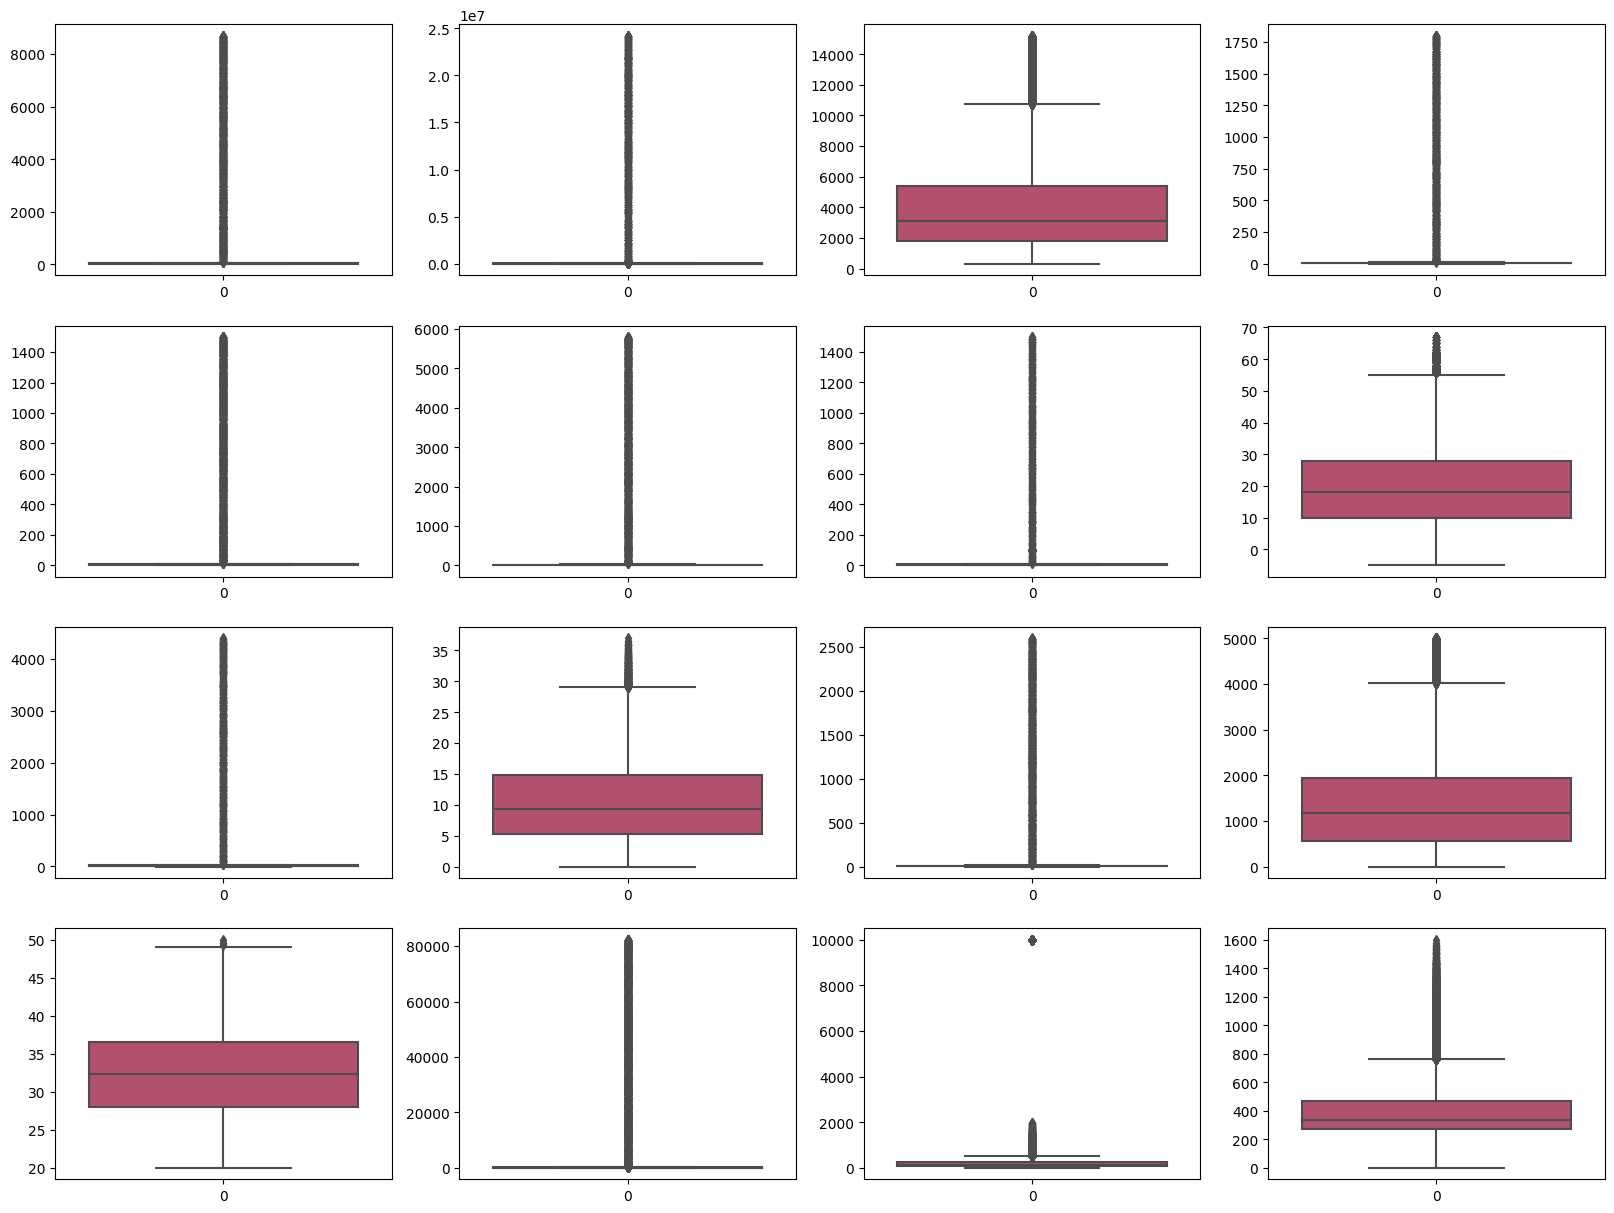

In [ ]:
box_plot(df_cleaned, col_int2,showfliers=True)

In [ ]:
# Drop outlier by IQR calculation
for i in col_int2:

    Q1 = np.percentile(df_cleaned[i], 0.05,interpolation = 'midpoint')
    Q3 = np.percentile(df_cleaned[i], 99.95,interpolation = 'midpoint')
    print("@ Feature " + i + "...")
    print("Old Shape: ", df_cleaned.shape)
    df_cleaned[col_int2] = df_cleaned[col_int2][(df_cleaned[i] < Q3) & (df_cleaned[i] > Q1)]
    df_cleaned.dropna(inplace=True)
    print("New Shape: ", df_cleaned.shape)

<ipython-input-39-599f90cec6e7>:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-39-599f90cec6e7>:5: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-39-599f90cec6e7>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



@ Feature Age...
Old Shape:  (97799, 21)


<ipython-input-39-599f90cec6e7>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



New Shape:  (96598, 21)
@ Feature Annual_Income...
Old Shape:  (96598, 21)
New Shape:  (96500, 21)
@ Feature Monthly_Inhand_Salary...
Old Shape:  (96500, 21)
New Shape:  (96402, 21)
@ Feature Num_Bank_Accounts...
Old Shape:  (96402, 21)
New Shape:  (92102, 21)
@ Feature Num_Credit_Card...
Old Shape:  (92102, 21)
New Shape:  (90260, 21)
@ Feature Interest_Rate...
Old Shape:  (90260, 21)
New Shape:  (88056, 21)
@ Feature Num_of_Loan...
Old Shape:  (88056, 21)
New Shape:  (79171, 21)
@ Feature Delay_from_due_date...
Old Shape:  (79171, 21)
New Shape:  (79076, 21)
@ Feature Num_of_Delayed_Payment...
Old Shape:  (79076, 21)
New Shape:  (78994, 21)
@ Feature Changed_Credit_Limit...
Old Shape:  (78994, 21)
New Shape:  (78909, 21)
@ Feature Num_Credit_Inquiries...
Old Shape:  (78909, 21)
New Shape:  (74152, 21)
@ Feature Outstanding_Debt...
Old Shape:  (74152, 21)
New Shape:  (74068, 21)
@ Feature Credit_Utilization_Ratio...
Old Shape:  (74068, 21)
New Shape:  (73992, 21)
@ Feature Total_EMI_p

In [ ]:
df_cleaned.drop(df_cleaned[df_cleaned["Age"] >= 80].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Annual_Income"] >= 500000].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Num_Bank_Accounts"] >= 20].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Num_Credit_Card"] >= 50].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Num_of_Loan"] >= 20].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Interest_Rate"] >= 35].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Num_Credit_Inquiries"] >= 100].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Num_of_Delayed_Payment"] >= 30].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Total_EMI_per_month"] >= 2000].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned["Amount_invested_monthly"] >= 1000].index, inplace=True)

<ipython-input-40-82dd089ced83>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-82dd089ced83>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-82dd089ced83>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-40-82dd089ced83>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [ ]:
### Balancing - Occupation
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

Manager          7389
Lawyer           3848
Mechanic         3699
Scientist        3651
Doctor           3645
Entrepreneur     3644
Architect        3608
Teacher          3573
Engineer         3573
Media_Manager    3556
Writer           3515
Developer        3512
Accountant       3500
Journalist       3498
Musician         3482
Name: Occupation, dtype: int64

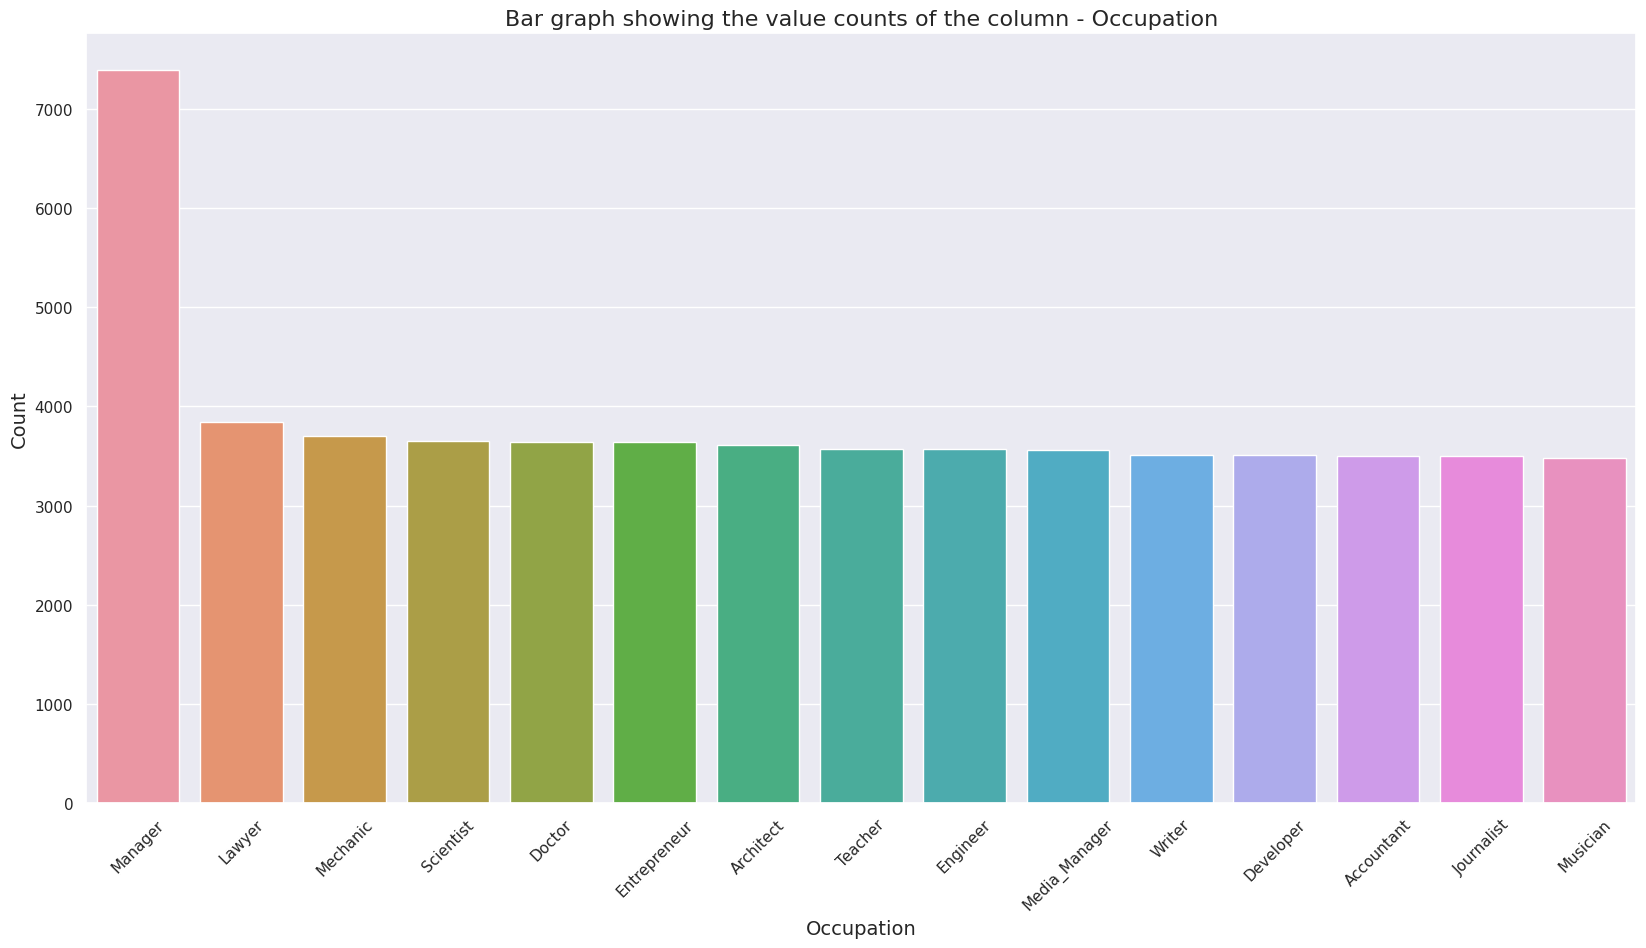

In [ ]:
sns.set(rc={'figure.figsize': (20, 10)})
sns.barplot(x=occupation_count.index, y=occupation_count.values)
plt.title('Bar graph showing the value counts of the column - Occupation', fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Occupation', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-44-60d2cc40aba9>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.076365               0.068892   
Annual_Income             0.076365       1.000000               0.908969   
Monthly_Inhand_Salary     0.068892       0.908969               1.000000   
Num_Bank_Accounts        -0.163320      -0.257913              -0.235205   
Num_Credit_Card          -0.126206      -0.187042              -0.172537   
Interest_Rate            -0.193527      -0.286405              -0.263600   
Num_of_Loan              -0.180085      -0.231218              -0.210704   
Delay_from_due_date      -0.146284      -0.226183              -0.208119   
Num_of_Delayed_Payment   -0.167599      -0.251497              -0.229954   
Changed_Credit_Limit     -0.135861      -0.149167              -0.138567   
Num_Credit_Inquiries     -0.215330      -0.250838              -0.232532   
Outstanding_Debt         -0.181704      -0.262484              -0.242641   
Credit_Utilization_Ratio  0.018220       0.142871               0.130935   
Total_EMI_per_month      -0.031577       0.541210               0.487944   
Amount_invested_monthly   0.044365       0.583859               0.545990   
Monthly_Balance           0.102175       0.688076               0.633926   

                          Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
Age                               -0.163320        -0.126206      -0.193527   
Annual_Income                     -0.257913        -0.187042      -0.286405   
Monthly_Inhand_Salary             -0.235205        -0.172537      -0.263600   
Num_Bank_Accounts                  1.000000         0.402354       0.545175   
Num_Credit_Card                    0.402354         1.000000       0.454120   
Interest_Rate                      0.545175         0.454120       1.000000   
Num_of_Loan                        0.455400         0.382362       0.517977   
Delay_from_due_date                0.535738         0.433595       0.554254   
Num_of_Delayed_Payment             0.528900         0.353569       0.508172   
Changed_Credit_Limit               0.268158         0.196526       0.307333   
Num_Credit_Inquiries               0.472357         0.400975       0.574330   
Outstanding_Debt                   0.508363         0.463760       0.617070   
Credit_Utilization_Ratio          -0.057510        -0.041239      -0.062569   
Total_EMI_per_month                0.028783         0.042857       0.036148   
Amount_invested_monthly           -0.152409        -0.115057      -0.172576   
Monthly_Balance                   -0.289368        -0.215673      -0.319406   

                          Num_of_Loan  Delay_from_due_date  \
Age                         -0.180085            -0.146284   
Annual_Income               -0.231218            -0.226183   
Monthly_Inhand_Salary       -0.210704            -0.208119   
Num_Bank_Accounts            0.455400             0.535738   
Num_Credit_Card              0.382362             0.433595   
Interest_Rate                0.517977             0.554254   
Num_of_Loan                  1.000000             0.471302   
Delay_from_due_date          0.471302             1.000000   
Num_of_Delayed_Payment       0.438922             0.489076   
Changed_Credit_Limit         0.336067             0.237155   
Num_Credit_Inquiries         0.488094             0.483422   
Outstanding_Debt             0.636174             0.551902   
Credit_Utilization_Ratio    -0.074672            -0.052630   
Total_EMI_per_month          0.284746             0.051952   
Amount_invested_monthly     -0.143171            -0.137574   
Monthly_Balance             -0.416997            -0.268778   

                          Num_of_Delayed_Payment  Changed_Credit_Limit  \
Age                                    -0.167599             -0.135861   
Annual_Income                          -0.251497             -0.149167   
Monthly_Inhand_Salary                  -0.229954             -0.138567   
Num_Bank_Accounts                       0.5

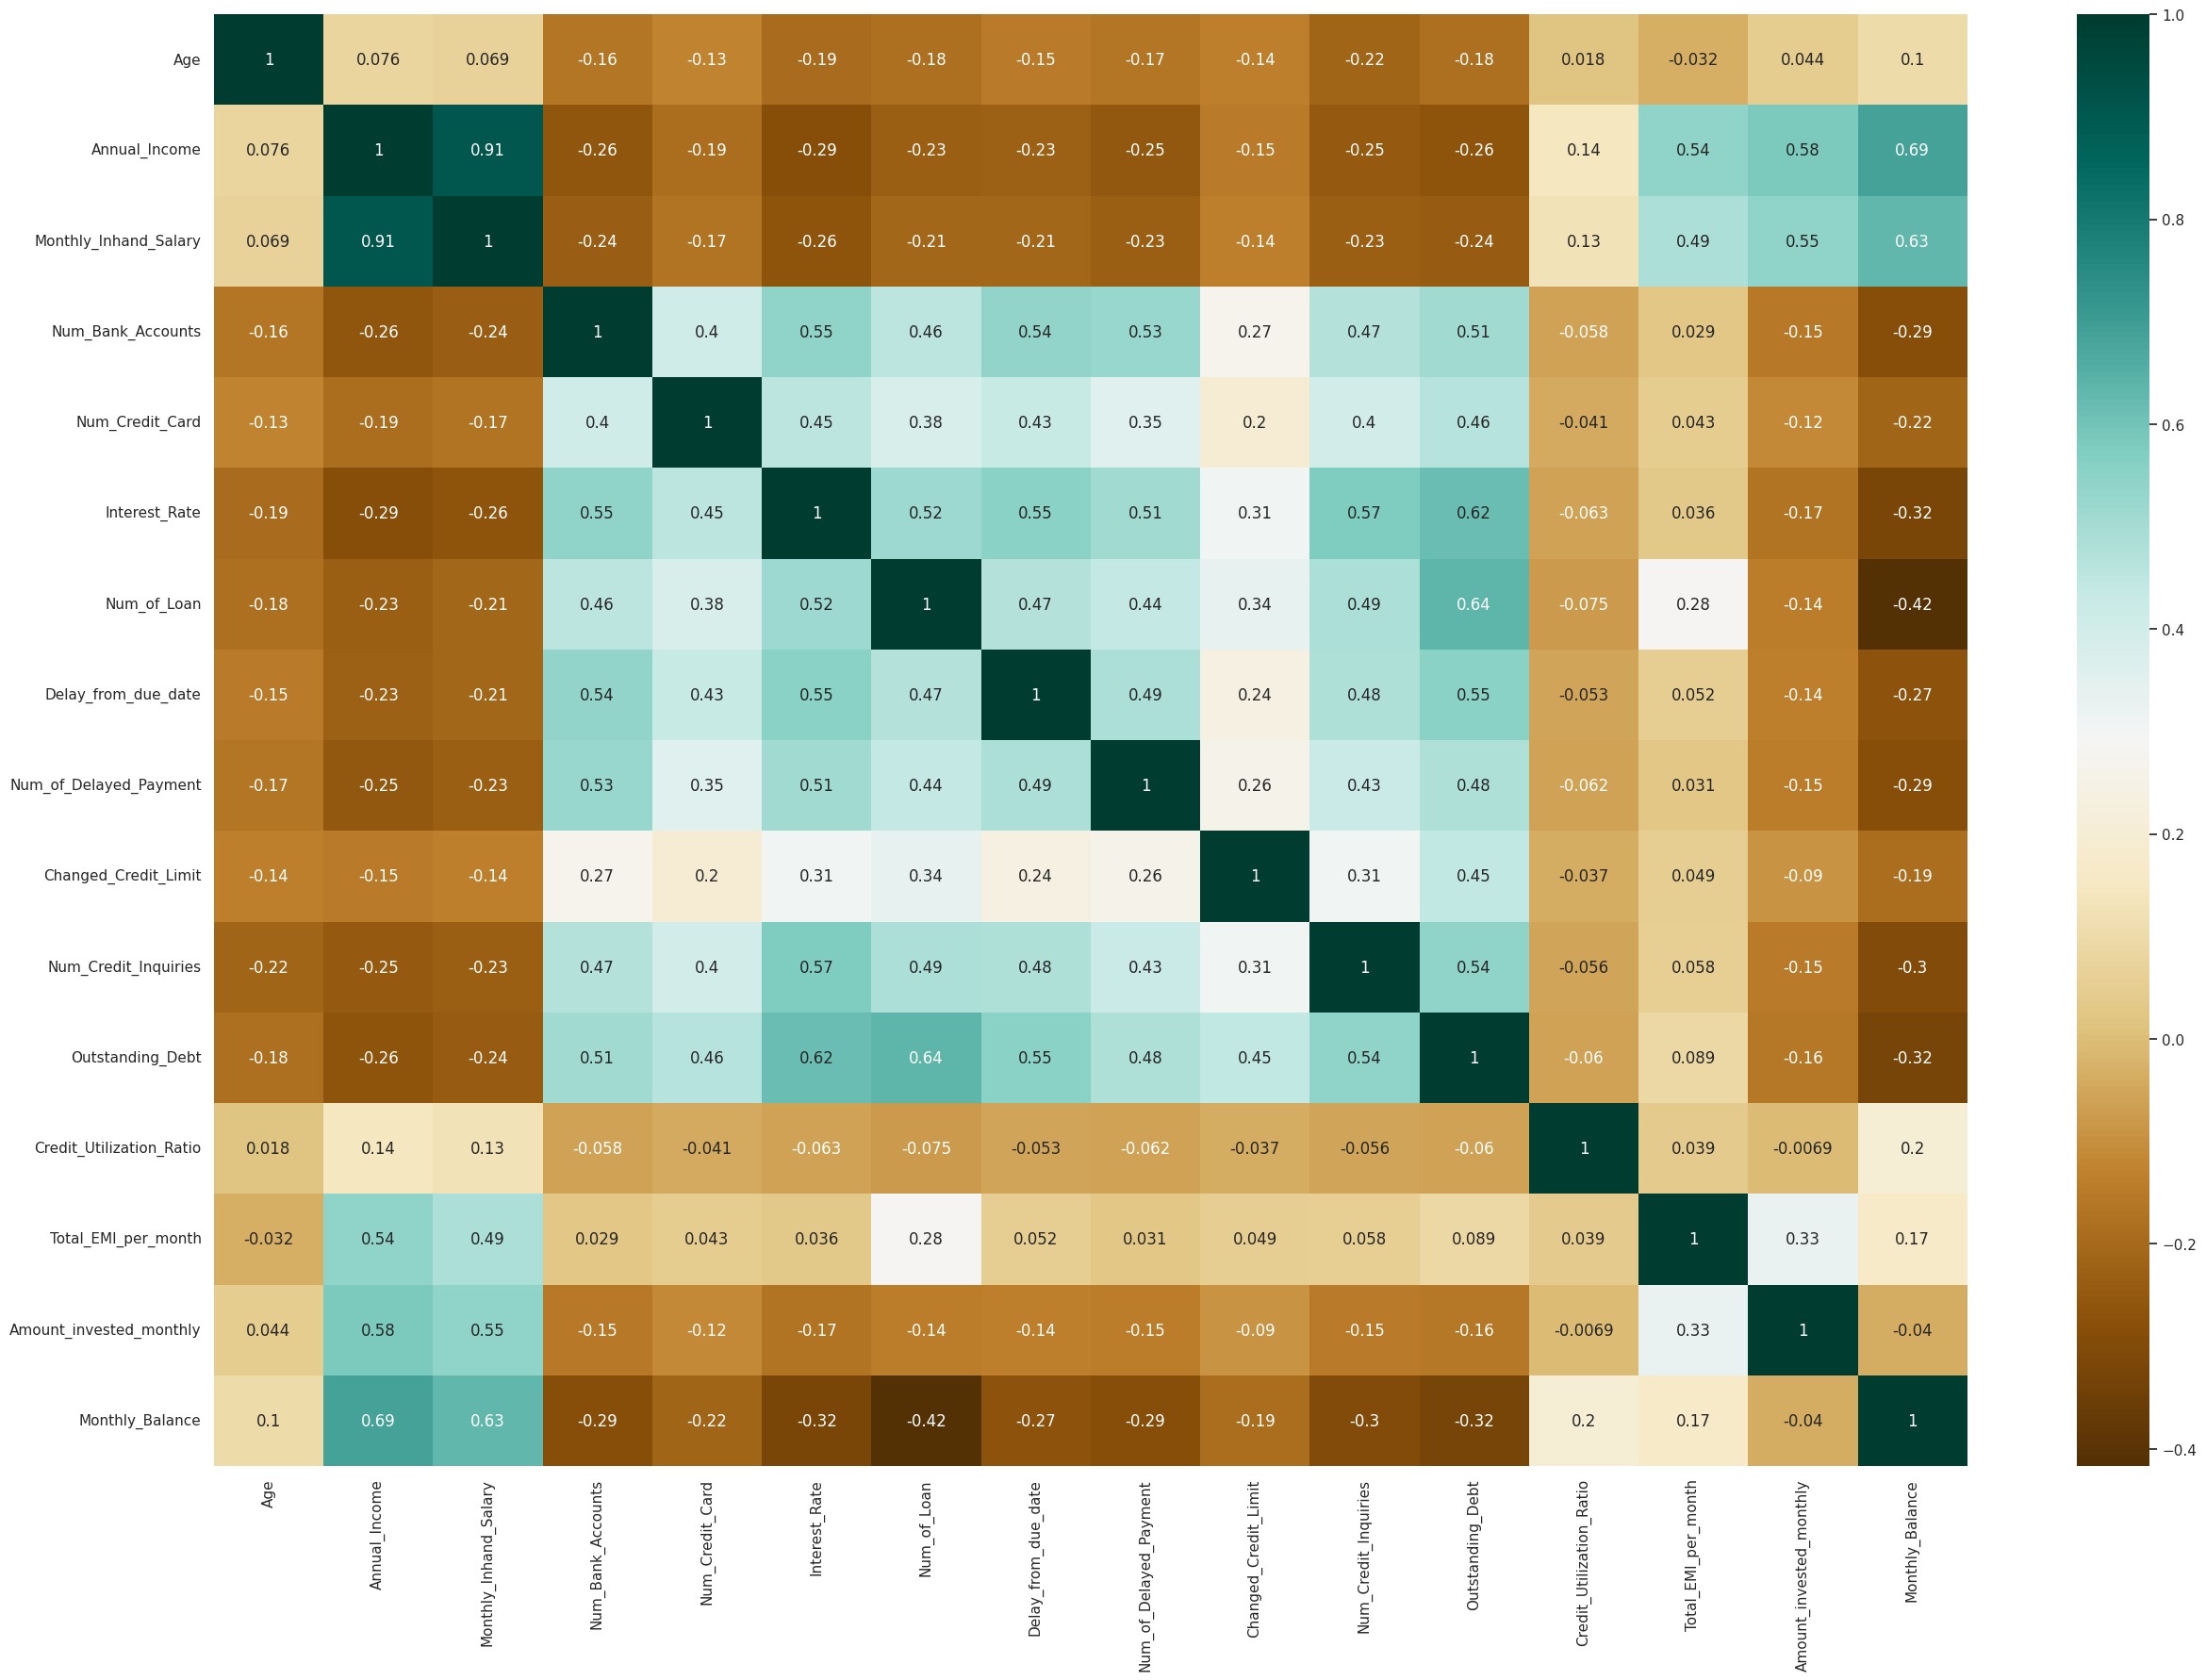

In [ ]:
plt.figure(figsize=(30,20))
c= df_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# ***Normalization***

In [ ]:
df_cleaned.head()

Age Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  23.0  Scientist       19114.12            1824.843333                3.0   
1  23.0  Scientist       19114.12            3091.000000                3.0   
3  23.0  Scientist       19114.12            3091.000000                3.0   
4  23.0  Scientist       19114.12            1824.843333                3.0   
5  23.0  Scientist       19114.12            3091.000000                3.0   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0              4.0            3.0          4.0                  3.0   
1              4.0            3.0          4.0                 -1.0   
3              4.0            3.0          4.0                  5.0   
4              4.0            3.0          4.0                  6.0   
5              4.0            3.0          4.0                  8.0   

   Num_of_Delayed_Payment  ...  Num_Credit_Inquiries  Credit_Mix  \
0                     7.0  ...                   4.0         Bad   
1                    14.0  ...                   4.0        Good   
3                     4.0  ...                   4.0        Good   
4                    14.0  ...                   4.0        Good   
5                     4.0  ...                   4.0        Good   

  Outstanding_Debt  Credit_Utilization_Ratio  Payment_of_Min_Amount  \
0           809.98                 26.822620                     No   
1           809.98                 31.944960                     No   
3           809.98                 31.377862                     No   
4           809.98                 24.797347                     No   
5           809.98                 27.262259                     No   

  Total_EMI_per_month  Amount_invested_monthly  \
0           49.574949                80.415295   
1           49.574949               118.280222   
3           49.574949               199.458074   
4           49.574949                41.420153   
5           49.574949                62.430172   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments      312.494089          Good  
1    Low_spent_Large_value_payments      284.629162          Good  
3    Low_spent_Small_value_payments      223.451310          Good  
4  High_spent_Medium_value_payments      341.489231          Good  
5  High_spent_Medium_value_payments      340.479212          Good  

[5 rows x 21 columns]

In [ ]:
df_num_clean = df_cleaned[col_int2].copy()

In [ ]:

scaler = MinMaxScaler()
for i in df_cleaned[col_int2]:
    df_cleaned[i] = scaler.fit_transform(df_cleaned[[i]])
df_cleaned.head()

<ipython-input-48-9fc4eca21e13>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-9fc4eca21e13>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-9fc4eca21e13>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-48-9fc4eca

Age Occupation  Annual_Income  Monthly_Inhand_Salary  \
0  0.195122  Scientist       0.025259               0.100325   
1  0.195122  Scientist       0.025259               0.186928   
3  0.195122  Scientist       0.025259               0.186928   
4  0.195122  Scientist       0.025259               0.100325   
5  0.195122  Scientist       0.025259               0.186928   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0           0.117647         0.042553        0.03125       0.1875   
1           0.117647         0.042553        0.03125       0.1875   
3           0.117647         0.042553        0.03125       0.1875   
4           0.117647         0.042553        0.03125       0.1875   
5           0.117647         0.042553        0.03125       0.1875   

   Delay_from_due_date  Num_of_Delayed_Payment  ...  Num_Credit_Inquiries  \
0             0.088235                0.300000  ...              0.034884   
1             0.029412                0.533333  ...              0.034884   
3             0.117647                0.200000  ...              0.034884   
4             0.132353                0.533333  ...              0.034884   
5             0.161765                0.200000  ...              0.034884   

   Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0         Bad         0.162205                  0.221787   
1        Good         0.162205                  0.437115   
3        Good         0.162205                  0.413276   
4        Good         0.162205                  0.136651   
5        Good         0.162205                  0.240268   

   Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                     No            0.023295                 0.071138   
1                     No            0.023295                 0.109397   
3                     No            0.023295                 0.191420   
4                     No            0.023295                 0.031737   
5                     No            0.023295                 0.052966   

                  Payment_Behaviour Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments        0.229545          Good  
1    Low_spent_Large_value_payments        0.208801          Good  
3    Low_spent_Small_value_payments        0.163256          Good  
4  High_spent_Medium_value_payments        0.251131          Good  
5  High_spent_Medium_value_payments        0.250379          Good  

[5 rows x 21 columns]

# ***Encoding***

In [ ]:
df_cleaned.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Payment_of_Min_Amount',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour',
       'Monthly_Balance', 'Credit_Score'],
      dtype='object')

In [ ]:
df_cleaned['Credit_Score'].replace({"Poor":0, "Standard":1, "Good":2}, inplace=True)
df_cleaned['Credit_Mix'].replace({"Bad":0, "Standard":1, "Good":2}, inplace=True)
df_cleaned['Payment_of_Min_Amount'].replace({"Yes":1, "No":0}, inplace=True)
df_cleaned = pd.get_dummies(df_cleaned, columns = ['Occupation', 'Payment_Behaviour'])

<ipython-input-50-a7ab88245e22>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-a7ab88245e22>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-50-a7ab88245e22>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
for i in col_int2:
    df_cleaned[i].fillna(method='ffill', inplace=True)

In [ ]:
df_cleaned.head()

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0  0.195122       0.025259               0.100325           0.117647   
1  0.195122       0.025259               0.186928           0.117647   
3  0.195122       0.025259               0.186928           0.117647   
4  0.195122       0.025259               0.100325           0.117647   
5  0.195122       0.025259               0.186928           0.117647   

   Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0         0.042553        0.03125       0.1875             0.088235   
1         0.042553        0.03125       0.1875             0.029412   
3         0.042553        0.03125       0.1875             0.117647   
4         0.042553        0.03125       0.1875             0.132353   
5         0.042553        0.03125       0.1875             0.161765   

   Num_of_Delayed_Payment  Changed_Credit_Limit  ...  Occupation_Musician  \
0                0.300000              0.331267  ...                    0   
1                0.533333              0.331267  ...                    0   
3                0.200000              0.183643  ...                    0   
4                0.533333              0.331267  ...                    0   
5                0.200000              0.272217  ...                    0   

   Occupation_Scientist  Occupation_Teacher  Occupation_Writer  \
0                     1                   0                  0   
1                     1                   0                  0   
3                     1                   0                  0   
4                     1                   0                  0   
5                     1                   0                  0   

   Payment_Behaviour_High_spent_Large_value_payments  \
0                                                  0   
1                                                  0   
3                                                  0   
4                                                  0   
5                                                  0   

   Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                  0    
1                                                  0    
3                                                  0    
4                                                  1    
5                                                  1    

   Payment_Behaviour_High_spent_Small_value_payments  \
0                                                  1   
1                                                  0   
3                                                  0   
4                                                  0   
5                                                  0   

   Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                 0   
1                                                 1   
3                                                 0   
4                                                 0   
5                                                 0   

   Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                  0   
1                                                  0   
3                                                  0   
4                                                  0   
5                                                  0   

   Payment_Behaviour_Low_spent_Small_value_payments  
0                                                 0  
1                                                 0  
3                                                 1  
4                                                 0  
5                                                 0  

[5 rows x 40 columns]

In [ ]:
#train test split
df_train_x=df_cleaned.drop(['Credit_Score'] , axis = 1).values
df_train_y=df_cleaned['Credit_Score'].values
x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

Modeling

In [ ]:
df["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
kn = KNeighborsClassifier()
nb =BernoulliNB()
dtree = DecisionTreeClassifier(random_state=1)
rf = RandomForestClassifier(random_state=10)

model=[kn,nb,dtree,rf]

# ***Performance Evaluation***

KNeighborsClassifier()
[[2371 1394  129]
 [1213 4561  390]
 [ 183  739  559]]
accuracy of KNeighborsClassifier() is 0.6491897044804575
              precision    recall  f1-score   support

           0       0.63      0.61      0.62      3894
           1       0.68      0.74      0.71      6164
           2       0.52      0.38      0.44      1481

    accuracy                           0.65     11539
   macro avg       0.61      0.58      0.59     11539
weighted avg       0.64      0.65      0.64     11539

****************************************************************************************************
BernoulliNB()
[[2103 1638  153]
 [1648 4026  490]
 [  96  908  477]]
accuracy of BernoulliNB() is 0.5724932836467631
              precision    recall  f1-score   support

           0       0.55      0.54      0.54      3894
           1       0.61      0.65      0.63      6164
           2       0.43      0.32      0.37      1481

    accuracy                           0.57     

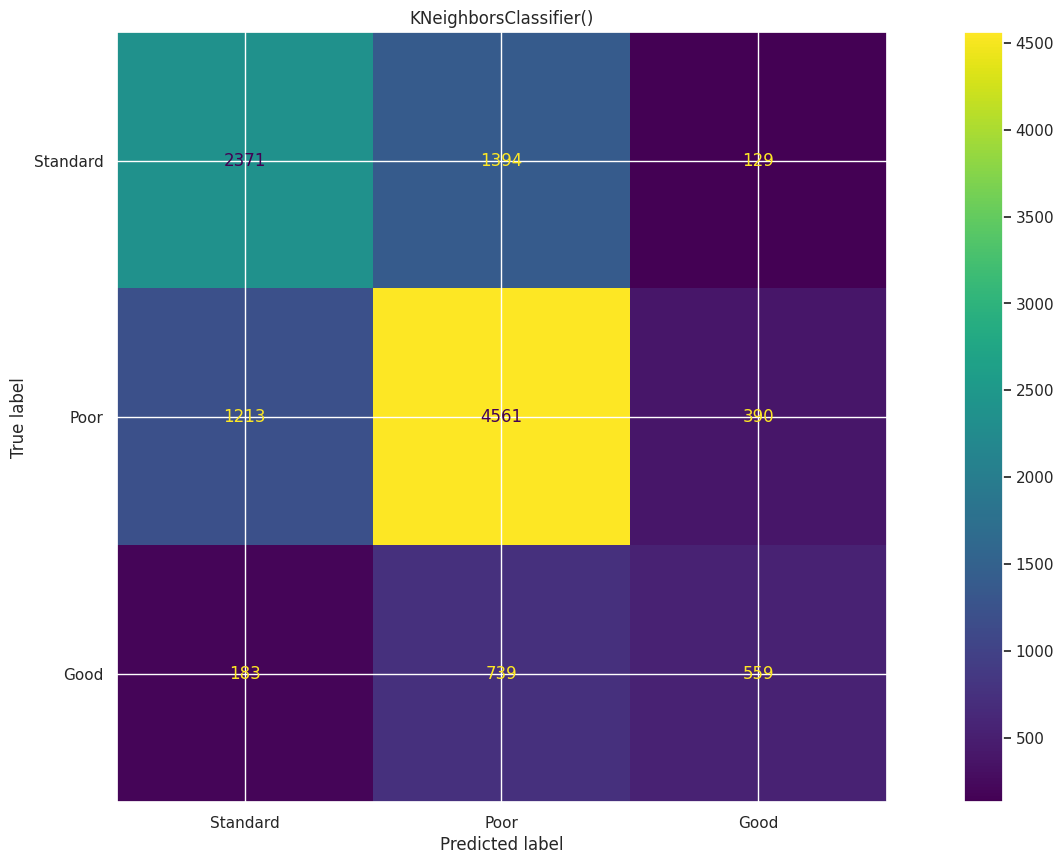

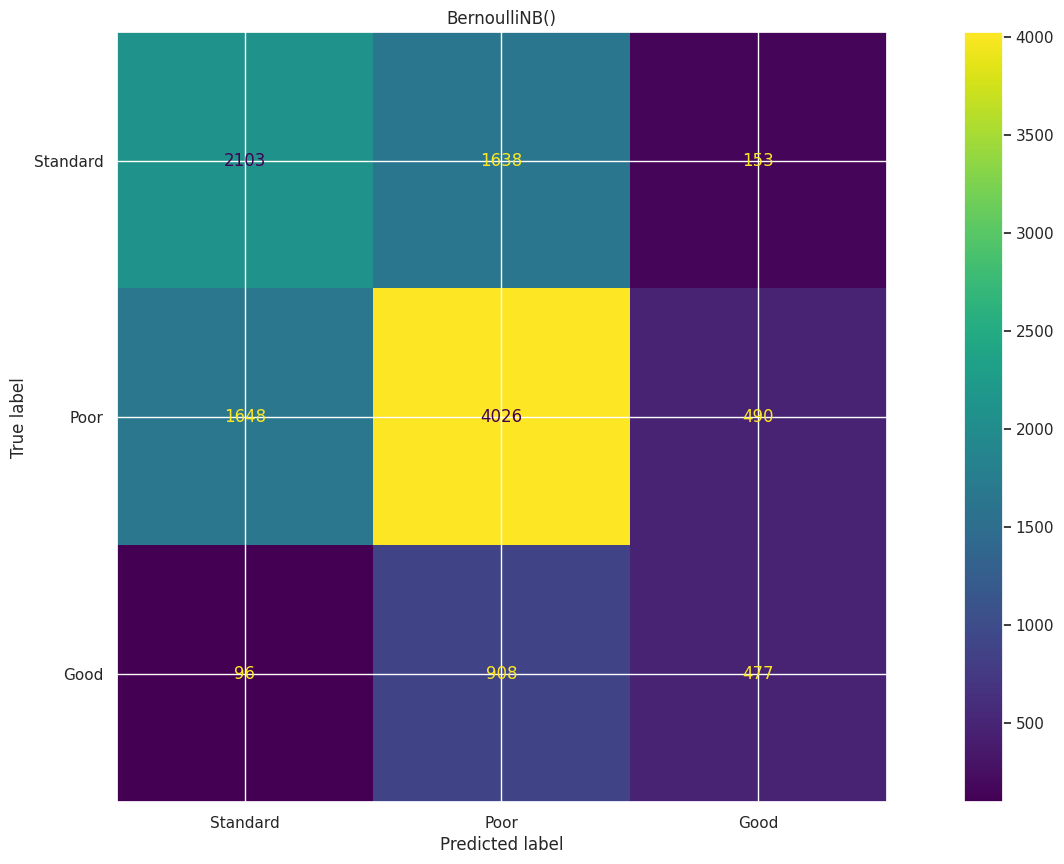

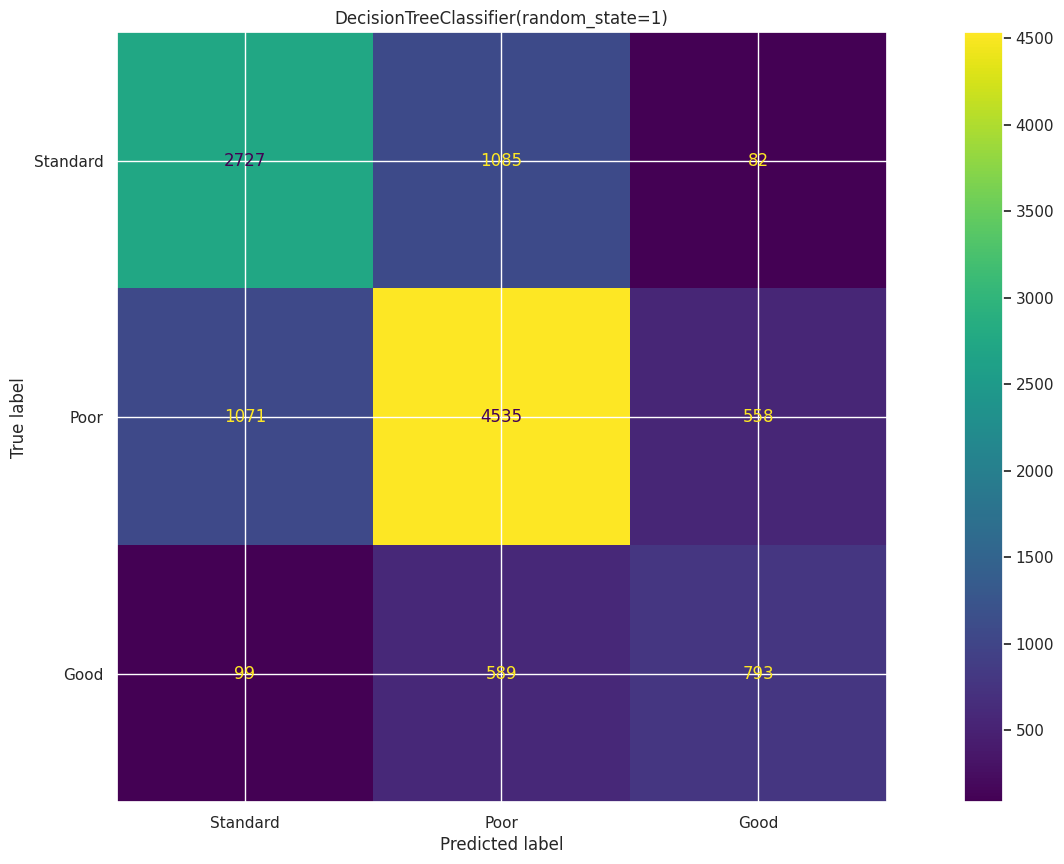

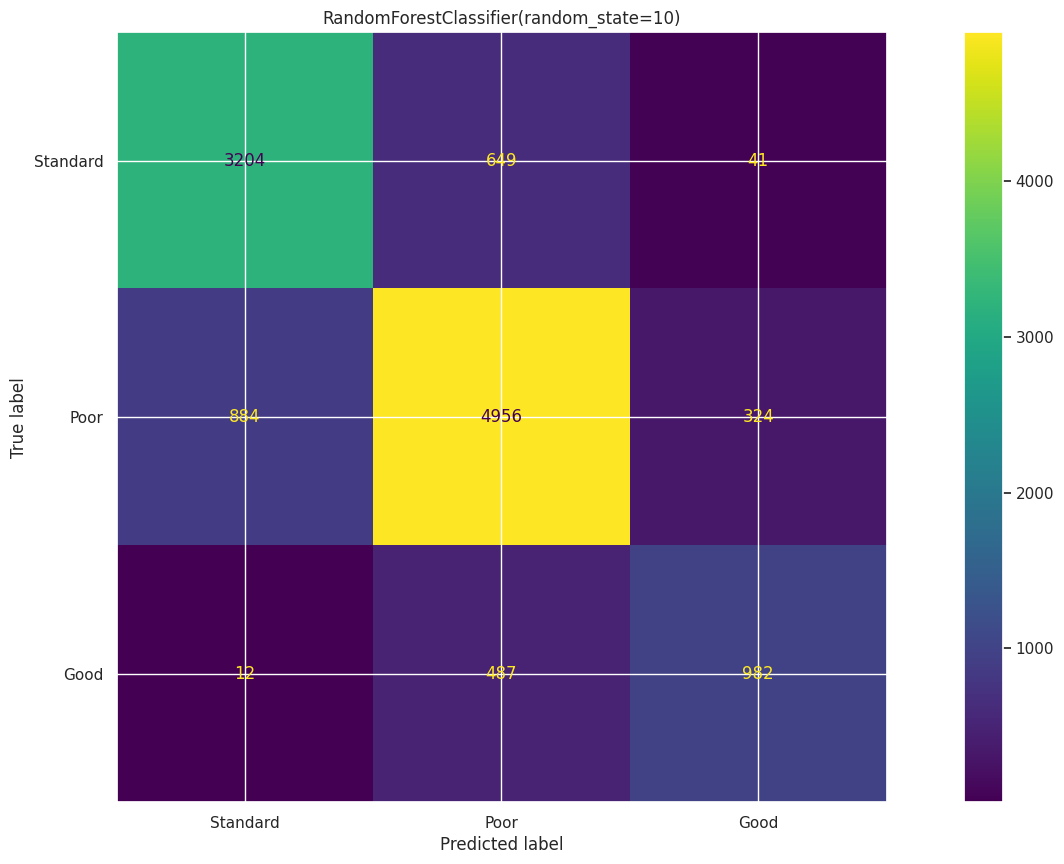

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
for i in model:
  print(i)
  i.fit(x_train, y_train)
  y_pred = i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  labels=['Standard','Poor','Good']
  cmd=ConfusionMatrixDisplay(result,display_labels=labels)
  cmd.plot()
  plt.title(i)
  print(result)
  print('accuracy of',i,'is',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('*'*100)

PARAMETER TUNING


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
clf=GridSearchCV(kn,param,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

# Get the best trained classifier
best_dt = clf.best_estimator_

# Evaluate the best classifier on the test set
y_pred = best_dt.predict(x_test)
accuracy_kn = accuracy_score(y_test, y_pred)
print("Validation accuracy:", accuracy_kn)

{'n_neighbors': 11, 'weights': 'distance'}
Validation accuracy: 0.6666955542074703


In [ ]:
# Define the parameter grid for grid search
param_grid = {
   'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
   'binarize': [0.0, 0.5, 1.0]  # Additional parameter for thresholding binarization
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(nb, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],
                         'binarize': [0.0, 0.5, 1.0]},
             scoring='accuracy')

In [ ]:
# Print the best parameter values found
print("Best parameters:", grid_search.best_params_)

# Get the best trained classifier
best_dt = grid_search.best_estimator_

# Evaluate the best classifier on the test set
y_pred = best_dt.predict(x_test)
accuracy_nb= accuracy_score(y_test, y_pred)
print("Validation accuracy:", accuracy_nb)

Best parameters: {'alpha': 5.0, 'binarize': 0.5}
Validation accuracy: 0.5893058323944883


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],  # Split criterion values to test
    'max_depth': [None, 5, 10, 20], # Minimum number of samples required at a leaf node values to test
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtree, param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train,y_train)

# Print the best parameter values found
print("Best parameters:", grid_search.best_params_)

# Get the best trained classifier
best_dt = grid_search.best_estimator_

# Evaluate the best classifier on the test set
y_pred = best_dt.predict(x_test)
accuracy_dtree = accuracy_score(y_test, y_pred)
print("Validation accuracy:", accuracy_dtree)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation accuracy: 0.7231129213970015


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train,y_train)

# Print the best parameter values found
print("Best parameters:", GridSearchCV.best_params_)

# Get the best trained classifier
best_rf = GridSearchCV.best_estimator_

# Evaluate the best classifier on the test set
y_pred = best_rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print("Validation accuracy:", accuracy_rf)

AttributeError: ignored

In [ ]:
kn_tuned = KNeighborsClassifier(n_neighbors=11, weights='distance')
nb_tuned = BernoulliNB(alpha =5.0,binarize= 0.5)
rf_tuned = RandomForestClassifier(random_state=10)
dtree_tuned = DecisionTreeClassifier(random_state=1,criterion='gini', max_depth=10,min_samples_split=2,min_samples_leaf=1)
model_tuned=[kn_tuned,nb_tuned,dtree_tuned,rf_tuned]

In [ ]:
rf_tuned.fit(x_train, y_train)
y_pred = rf_tuned.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred)
print(accuracy_rf)

0.7922696940809429


KNeighborsClassifier(n_neighbors=11, weights='distance')
[[2324 1381  189]
 [1019 4664  481]
 [  65  711  705]]
accuracy of KNeighborsClassifier(n_neighbors=11, weights='distance') is 0.6666955542074703
              precision    recall  f1-score   support

           0       0.68      0.60      0.64      3894
           1       0.69      0.76      0.72      6164
           2       0.51      0.48      0.49      1481

    accuracy                           0.67     11539
   macro avg       0.63      0.61      0.62     11539
weighted avg       0.66      0.67      0.66     11539

****************************************************************************************************
BernoulliNB(alpha=0.5, binarize=0.5)
[[2450 1068  376]
 [1513 3394 1257]
 [  63  462  956]]
accuracy of BernoulliNB(alpha=0.5, binarize=0.5) is 0.5893058323944883
              precision    recall  f1-score   support

           0       0.61      0.63      0.62      3894
           1       0.69      0.55      0.61

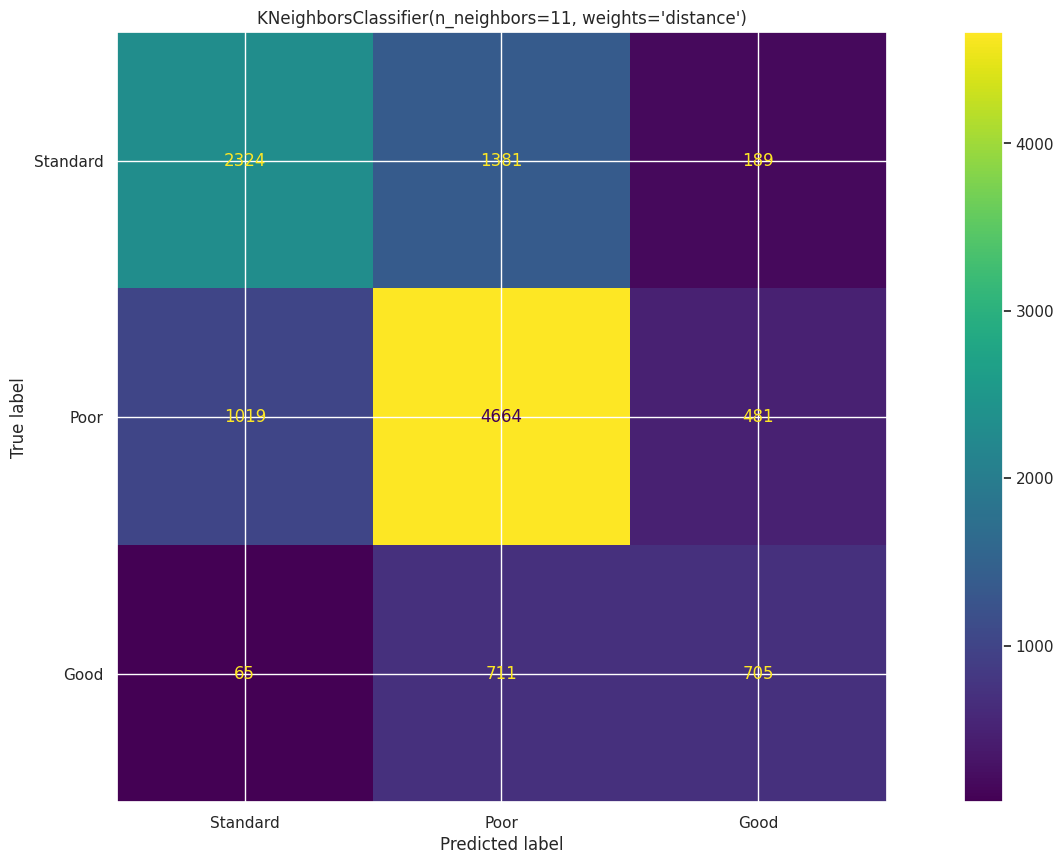

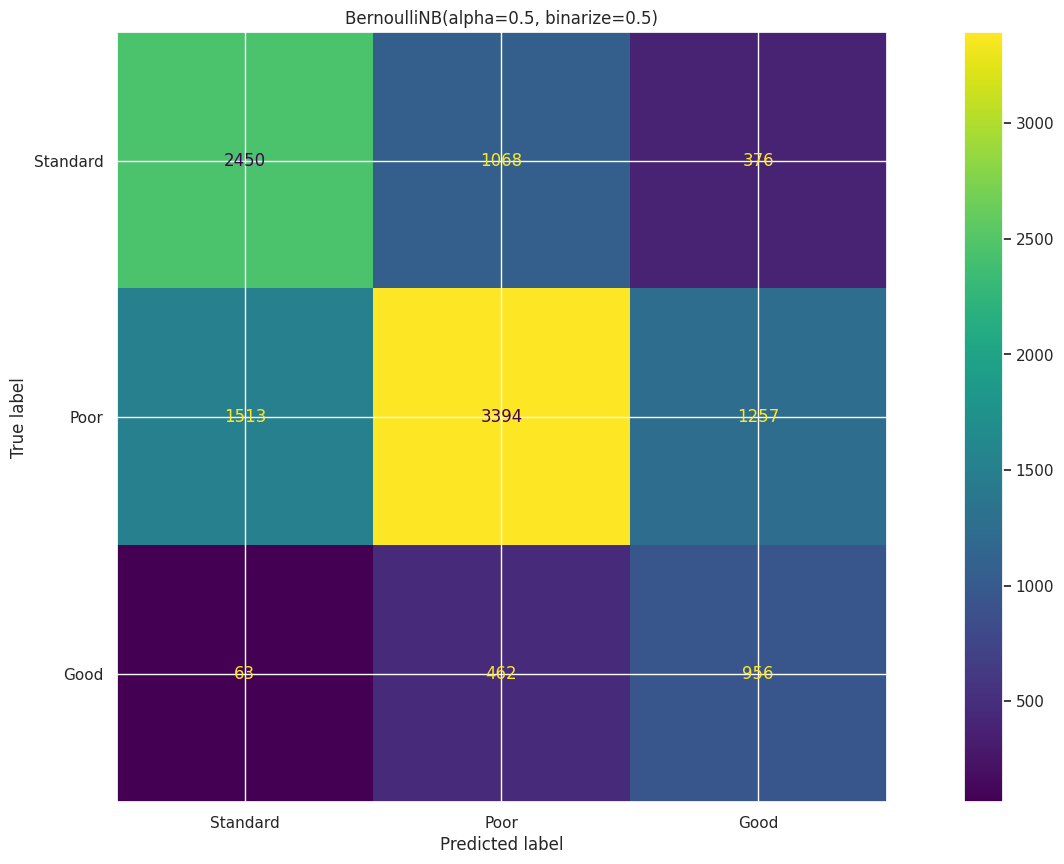

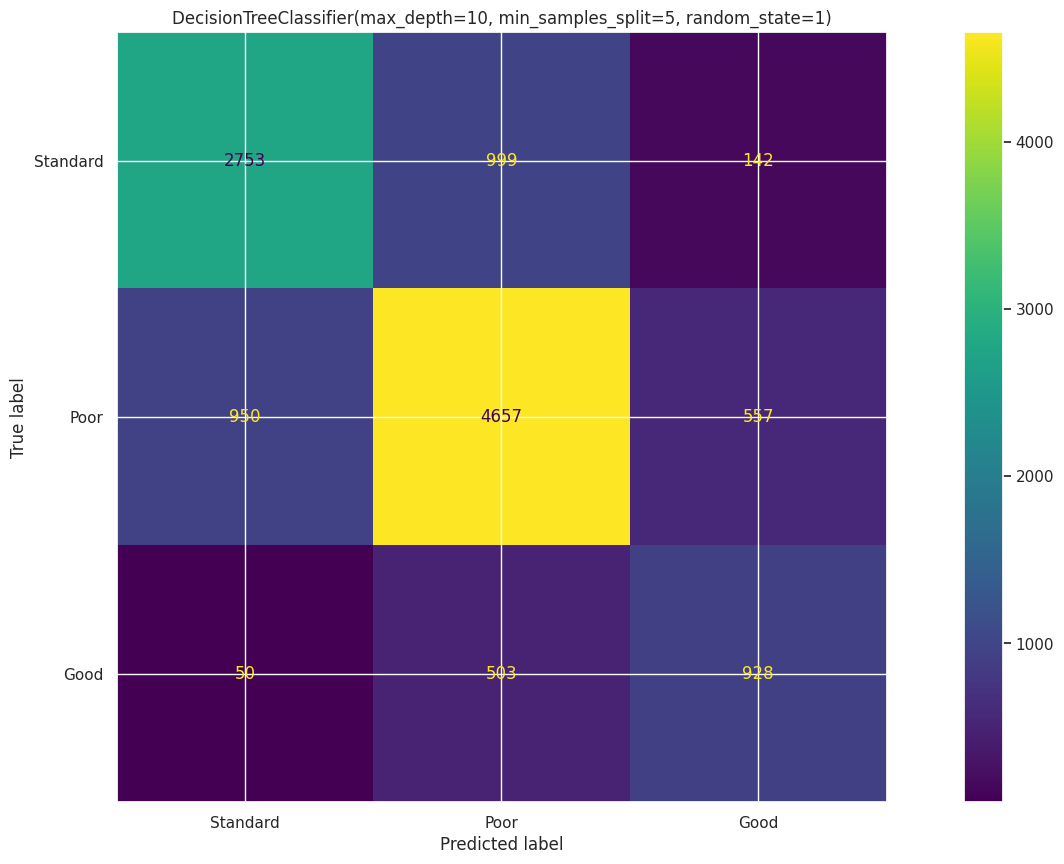

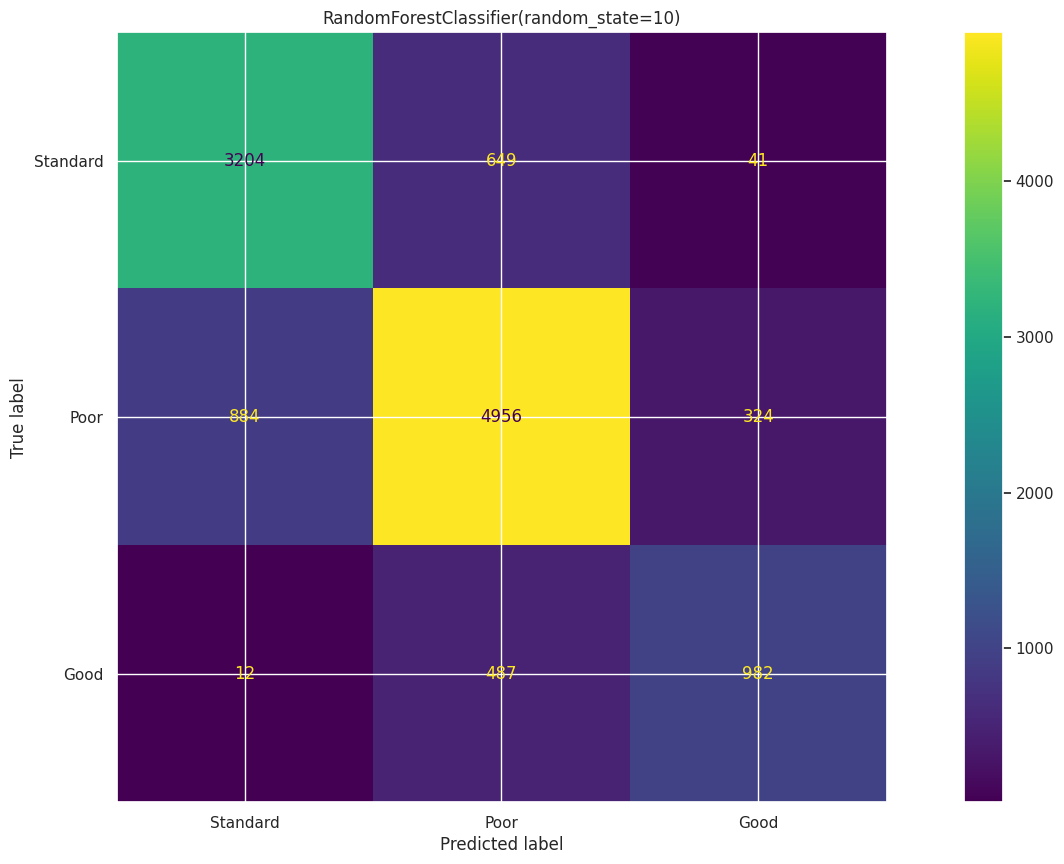

In [ ]:
for i in model_tuned:
  print(i)
  i.fit(x_train, y_train)
  y_pred = i.predict(x_test)
  result=confusion_matrix(y_test,y_pred)
  labels=['Standard','Poor','Good']
  cmd=ConfusionMatrixDisplay(result,display_labels=labels)
  cmd.plot()
  plt.title(i)
  print(result)
  print('accuracy of',i,'is',accuracy_score(y_test,y_pred))
  print(classification_report(y_test,y_pred))
  print('*'*100)

In [ ]:
algorithm=["KN","MNB","DTREE","Randomforest"]
accuracy=[accuracy_kn,accuracy_nb,accuracy_dtree,accuracy_rf]
comp_df=pd.DataFrame({'model':algorithm,'accuracy_score':accuracy})
comp_df

model  accuracy_score
0            KN        0.666696
1           MNB        0.589306
2         DTREE        0.723113
3  Randomforest        0.792270